# Predicting Salary Using Regression Model
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('../data/past_salaries.csv').drop(['Unnamed: 0'], axis = 1)
df.head(3)

,playerID,yearID_x,teamID_x,lgID_x,G,AB,R,H,2B,3B,...,BB,SO,HBP,SH,SF,AVG,OBP,SLG,OPS,salary
0,abreujo02,2016,CHA,AL,159,624,67,183,32,1,...,47,125.0,15.0,0.0,9.0,0.293,0.353,0.468,0.821,7000000
1,abreujo02,2016,CHA,AL,159,624,67,183,32,1,...,47,125.0,15.0,0.0,9.0,0.293,0.353,0.468,0.821,8666000
2,abreujo02,2016,CHA,AL,159,624,67,183,32,1,...,47,125.0,15.0,0.0,9.0,0.293,0.353,0.468,0.821,11666667


In [3]:
df.shape

(7754, 24)

In [4]:
# Convert salary from object to int
#df['salary'] = df['salary'].str.replace(',', '').str.replace('$', '').astype(int)

#Copied from https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

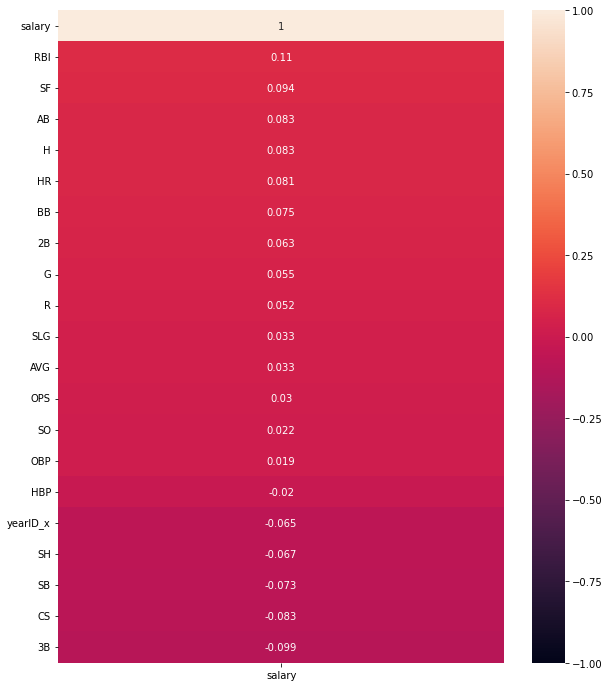

In [5]:
corr_matrix = df.corr()

plt.figure(figsize=(10,12))

sns.heatmap(corr_matrix[['salary']].sort_values(by = 'salary',ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'rocket');

#copied from lesson 3.04

## Create X and y variables for Salary

In [6]:
X = df.drop(columns = ['playerID', 'yearID_x', 'salary', 'teamID_x', 'lgID_x'])
y = df['salary']
X.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,AVG,OBP,SLG,OPS
0,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,15.0,0.0,9.0,0.293,0.353,0.468,0.821
1,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,15.0,0.0,9.0,0.293,0.353,0.468,0.821
2,159,624,67,183,32,1,25,100.0,0.0,2.0,47,125.0,15.0,0.0,9.0,0.293,0.353,0.468,0.821
3,156,621,95,189,43,6,33,102.0,3.0,0.0,35,119.0,15.0,0.0,4.0,0.304,0.354,0.552,0.906
4,156,621,95,189,43,6,33,102.0,3.0,0.0,35,119.0,15.0,0.0,4.0,0.304,0.354,0.552,0.906


## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=42)

## Standard Scaler

In [8]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [9]:
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform(X_train_sc)
X_poly_test = poly.transform(X_test_sc)

In [10]:
pca = PCA(random_state=42)
X_train_p = pca.fit_transform(X_poly_train)
X_test_p = pca.transform(X_poly_test)

In [11]:
def reg_metrics(x, y, model):
    y_pred = model.predict(x)
    resids = y - y_pred

    mse = metrics.mean_squared_error(y, y_pred)
    rmse = metrics.mean_squared_error(y, y_pred, squared = False)
    score = model.score(x, y)
    
    print(model)
    print("R2: ", score)
    print("MSE: ", mse)
    print("RMSE: ", rmse)

In [12]:
def fit_models(x, y, x_test, y_test, model):
    model.fit(x, y)
    
    print()
    print(f'Train')
    reg_metrics(x, y, model)
    
    print()
    print(f'Test')
    reg_metrics(x_test, y_test, model)

#### Linear Regression

In [13]:
lr = LinearRegression()

#### RidgeCV

In [14]:
#ridge alphas
r_alphas = np.logspace(0, 5, 220)

ridge_cv = RidgeCV(r_alphas, scoring='r2', cv=5)

#### LassoCV

In [15]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 1, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50_000, n_jobs=-1)

#### ElasticNetCV

In [16]:
# Set up a list of alphas to check.
e_alphas = np.linspace(0.01, 1, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.05

# Instantiate model.
enet_cv= ElasticNetCV(alphas=e_alphas,
                          l1_ratio=enet_ratio, 
                          cv=5, 
                          max_iter=3000, 
                          n_jobs=-1)

#### SGD

In [17]:
sgd = SGDRegressor()

#### KNeighbors

In [18]:
knn = KNeighborsRegressor()

#### AdaBoost

In [19]:
ad = AdaBoostRegressor()

#### GradientBoost

In [20]:
gb = GradientBoostingRegressor()

#### HistGradientBoosting

In [21]:
hgb = HistGradientBoostingRegressor()

#### RandomForest

In [22]:
rf = RandomForestRegressor()

#### SVR

In [23]:
svr = SVR()

#### DecisionTree

In [24]:
dt = DecisionTreeRegressor()

In [25]:
models = [lr, ridge_cv, lasso_cv, enet_cv, sgd, knn, ad, gb, hgb, rf, svr, dt]

for model in models:
    fit_models(X_train_p, y_train, X_test_p, y_test, model)


Train
LinearRegression()
R2:  0.1848645802446629
MSE:  26074949781169.684
RMSE:  5106363.655398006

Test
LinearRegression()
R2:  0.051802301759068525
MSE:  28113136378763.55
RMSE:  5302182.227985336

Train
RidgeCV(alphas=array([1.00000000e+00, 1.05397680e+00, 1.11086709e+00, 1.17082814e+00,
       1.23402569e+00, 1.30063444e+00, 1.37083853e+00, 1.44483200e+00,
       1.52281940e+00, 1.60501632e+00, 1.69164996e+00, 1.78295980e+00,
       1.87919826e+00, 1.98063137e+00, 2.08753951e+00, 2.20021820e+00,
       2.31897894e+00, 2.44414999e+00, 2.57607738e+00, 2.71512579e+00,
       2.86167958e+00, 3.01614388e+0...
       2.98459801e+04, 3.14569705e+04, 3.31549170e+04, 3.49445132e+04,
       3.68307062e+04, 3.88187097e+04, 4.09140193e+04, 4.31224271e+04,
       4.54500376e+04, 4.79032850e+04, 5.04889509e+04, 5.32141828e+04,
       5.60865140e+04, 5.91138844e+04, 6.23046625e+04, 6.56676687e+04,
       6.92121991e+04, 7.29480519e+04, 7.68855541e+04, 8.10355901e+04,
       8.54096317e+04, 9.001

In [39]:
test = pd.read_csv('../data/mlb_players.csv').drop(['Unnamed: 0'], axis = 1)
test.head()

,MLBID,FIRSTNAME,LASTNAME,ACTIVE,Player,Team,Pos,Age,G,AB,...,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,salary
0,547989,Jose,Abreu,Y,Jose Abreu,CWS,1B,34,152,566,...,61,143,0,10,22,0.261,0.351,0.481,0.832,"$17,666,666"
1,642715,Willy,Adames,Y,Willy Adames,TB,SS,26,41,132,...,10,51,0,0,0,0.197,0.254,0.371,0.625,"$590,000"
2,501303,Ehire,Adrianza,Y,Ehire Adrianza,ATL,SS,32,109,182,...,21,42,1,3,2,0.247,0.327,0.401,0.728,"$1,500,000"
3,542583,Jesus,Aguilar,Y,Jesus Aguilar,MIA,1B,31,131,449,...,46,93,0,7,3,0.261,0.329,0.459,0.788,"$4,500,000"
4,605113,Nick,Ahmed,Y,Nick Ahmed,ARI,SS,31,129,434,...,34,104,2,1,2,0.221,0.280,0.339,0.619,"$8,125,000"


In [40]:
test_data = test.drop(columns = ['MLBID', 'FIRSTNAME', 'LASTNAME', 'ACTIVE', 'Player', 'Team', 'Pos', 'Age', 'salary'])
test_data = ss.transform(test_data)
test_data = poly.transform(test_data)
test_data = pca.transform(test_data)

preds = lr.predict(test_data)
preds = ['{:f}'.format(item) for item in preds]
#https://stackoverflow.com/questions/32635911/convert-elements-of-an-array-from-scientific-notation-to-decimal-notation-in-pyt

test['pred_salary'] = preds

In [41]:
test

,MLBID,FIRSTNAME,LASTNAME,ACTIVE,Player,Team,Pos,Age,G,AB,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,salary,pred_salary
0,547989,Jose,Abreu,Y,Jose Abreu,CWS,1B,34,152,566,...,143,0,10,22,0.261,0.351,0.481,0.832,"$17,666,666",-11966696.779205
1,642715,Willy,Adames,Y,Willy Adames,TB,SS,26,41,132,...,51,0,0,0,0.197,0.254,0.371,0.625,"$590,000",1636457.428655
2,501303,Ehire,Adrianza,Y,Ehire Adrianza,ATL,SS,32,109,182,...,42,1,3,2,0.247,0.327,0.401,0.728,"$1,500,000",3916487.454414
3,542583,Jesus,Aguilar,Y,Jesus Aguilar,MIA,1B,31,131,449,...,93,0,7,3,0.261,0.329,0.459,0.788,"$4,500,000",5471889.450507
4,605113,Nick,Ahmed,Y,Nick Ahmed,ARI,SS,31,129,434,...,104,2,1,2,0.221,0.280,0.339,0.619,"$8,125,000",3130222.622460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,676694,Jake,Meyers,Y,Jake Meyers,HOU,OF,25,49,146,...,50,2,1,4,0.260,0.323,0.438,0.761,"$570,500",4460740.404365
389,656537,Derek,Hill,Y,Derek Hill,DET,OF,25,49,139,...,42,0,0,1,0.259,0.313,0.388,0.701,"$570,500",1444747.967972
390,657757,Gavin,Sheets,Y,Gavin Sheets,CWS,OF,25,54,160,...,40,0,1,2,0.250,0.324,0.506,0.830,"$570,500",4923801.438673
391,642201,Eli,White,Y,Eli White,TEX,OF,27,64,198,...,66,0,0,4,0.177,0.259,0.308,0.567,"$572,500",6694657.763475
